<a href="https://colab.research.google.com/github/ilhamydn17/PCVK_Ganjil_2023/blob/jobsheet-week-10/PCVK_Week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCVK-10
### Thresholding

#### Importing Required Library

In [ ]:
!pip install pytesseract

In [60]:
import cv2
import numpy as np
import pytesseract as pyt
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow as show

### 1. Global Threshold

In [22]:
def compare(img1, img2):
  fig = plt.figure()

  # Add the before and after images to the figure as subplots.
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)

  fig.suptitle('Image Comparison')
  ax1.set_title('Before')
  ax2.set_title('After')

  ax1.imshow(img1, cmap='gray')
  ax2.imshow(img2, cmap='gray')

  plt.show()



#### Binary Threshold

In [8]:
def binary_threshold(image, threshold):
  # convert the image to numpy array
  image_array = np.array(image)
  # threshold the image pixel
  thresholded_image = np.where(image_array > threshold, 255,0)

  return thresholded_image

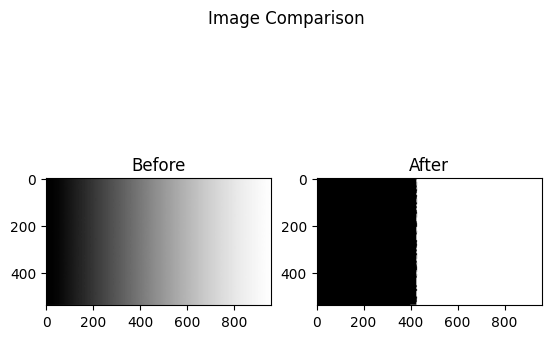

In [23]:
image = cv.imread('drive/MyDrive/Kuliah/PCVK/week-10/gradient.jpg', cv.IMREAD_GRAYSCALE)
threshold = 127
thresholded_image = binary_threshold(image, threshold)

compare(image, thresholded_image)

#### Binary Inverted

In [30]:
def binary_inverted(image, threshold):
  # Apply binary inversion
  binary_inverted_image = np.zeros_like(image)
  binary_inverted_image[image <= threshold] = 255
  return binary_inverted_image

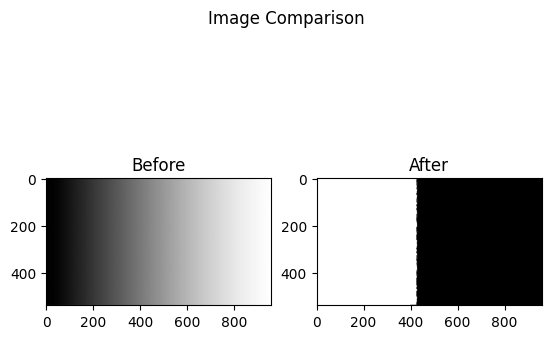

In [31]:
image = cv.imread('drive/MyDrive/Kuliah/PCVK/week-10/gradient.jpg', cv.IMREAD_GRAYSCALE)
threshold = 127
bin_inv_image = binary_inverted(image, threshold)
compare(image, bin_inv_image)

#### Truncated Threshold

In [49]:
threshold = 120

def truncated_threshold(image, threshold):
  # Apply truncated threshold
  truncated_threshold_image = np.copy(image)
  truncated_threshold_image[truncated_threshold_image < threshold] = threshold

  return truncated_threshold_image

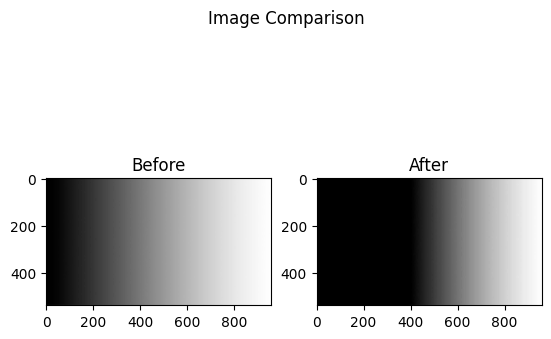

In [50]:
truc_img = truncated_threshold(image, threshold)
compare(image, truc_img)

#### Threshold To Zero

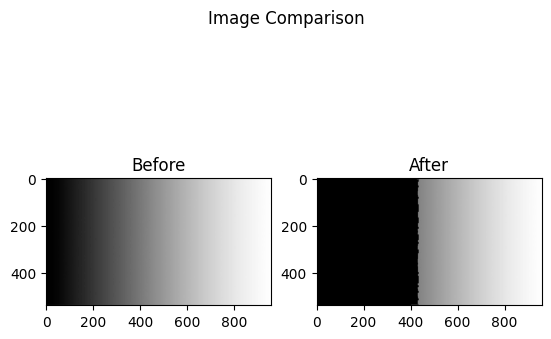

In [44]:
# Define the threshold value (you can adjust this value)
threshold_value = 130

# Apply threshold to zero
threshold_to_zero_image = np.copy(image)
threshold_to_zero_image[threshold_to_zero_image < threshold_value] = 0

compare(image, threshold_to_zero_image)

#### Threshold to Zero Inverted

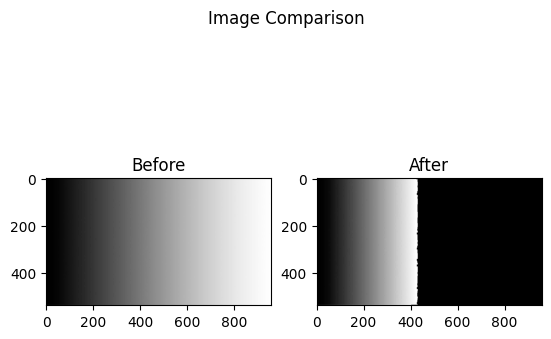

In [52]:
# Define the threshold value (you can adjust this value)
threshold_value = 128

# Apply threshold to zero
threshold_to_zero_image = np.copy(image)
threshold_to_zero_image[threshold_to_zero_image > threshold_value] = 0

compare(image, threshold_to_zero_image)

## 2. Global & Otsu Thresholding

In [70]:
img = cv2.imread('drive/MyDrive/Kuliah/PCVK/week-10/ktp_riyanto.png', cv2.IMREAD_GRAYSCALE)

#### Global Thresholding

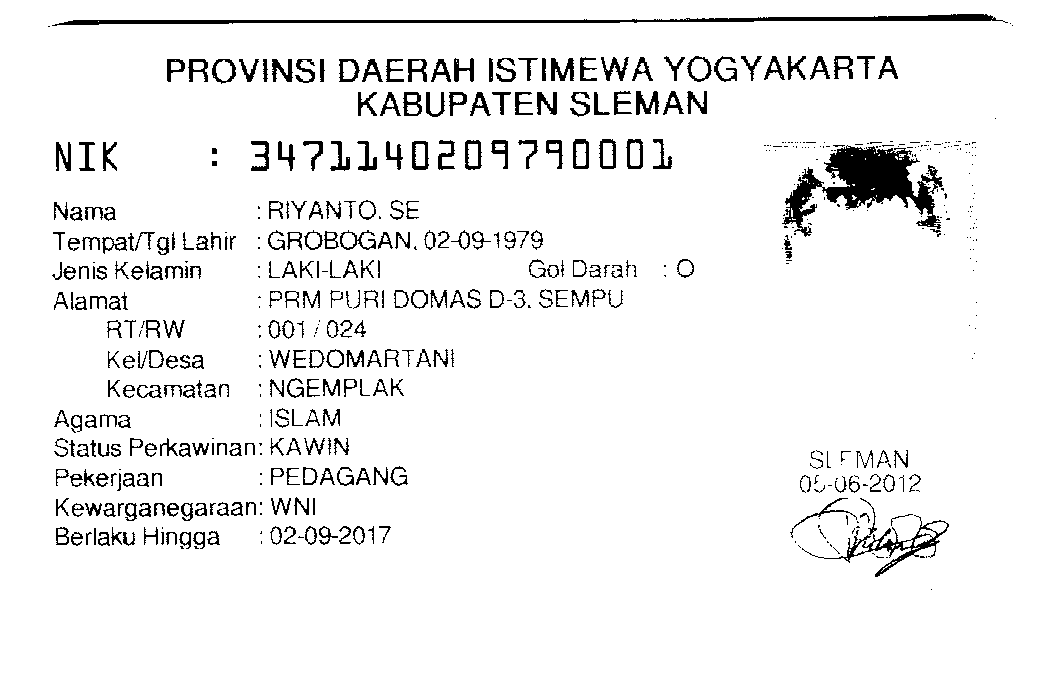

In [71]:
threshold_val = 90
# create a binary mask using Numpy
glob_thres = (img > threshold_val).astype(np.uint8) * 255
show(glob_thres)

#### Otsu's Thresholding

In [73]:
# Calculate the histogram of the image
histogram = np.bincount(img.ravel(), minlength=256)

# Calculate the total number of pixels (N)
N = img.size

# Initialize variables
sum_pixels = 0
sum_pixels_squared = 0
max_variance = 0
threshold_value = 0

# Loop through all possible threshold values (0-255)
for t in range(256):
    # Calculate the probabilities P1 and P2
    P1 = np.sum(histogram[:t]) / N
    P2 = 1 - P1

    # Calculate the mean values mu1 and mu2
    mu1 = np.sum(np.arange(t) * histogram[:t]) / (N * P1)
    mu2 = np.sum(np.arange(t, 256) * histogram[t:]) / (N * P2)

    # Calculate the between-class variance
    variance = P1 * P2 * (mu1 - mu2)**2

    # Update maximum variance and threshold value
    if variance > max_variance:
        max_variance = variance
        threshold_value = t

# Apply the threshold to the img
otsu = (img > threshold_value) * 255

<ipython-input-73-0790705a052b>:20: RuntimeWarning: invalid value encountered in double_scalars
  mu1 = np.sum(np.arange(t) * histogram[:t]) / (N * P1)


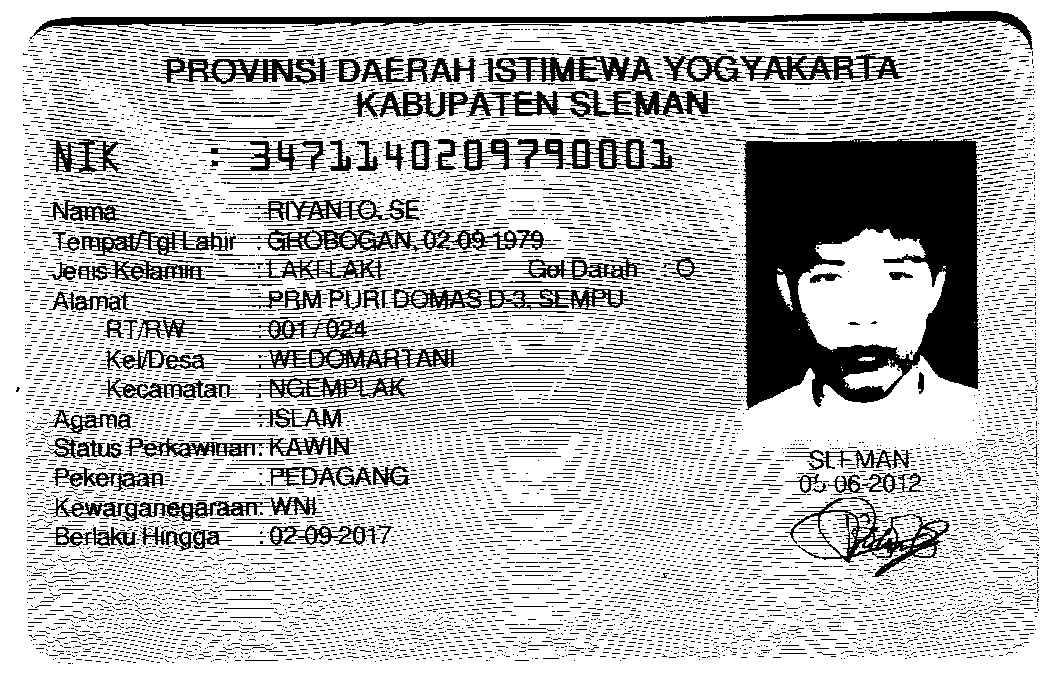

In [74]:
show(otsu)

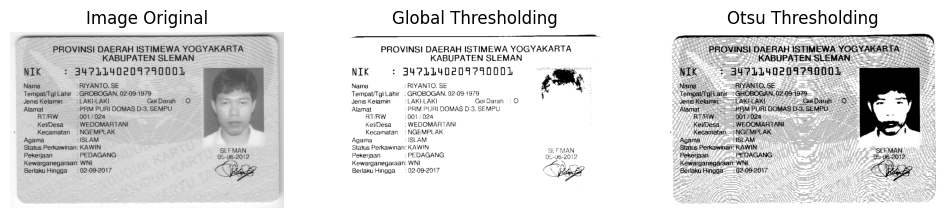

In [75]:
# Create a figure with three subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display the first image on the first subplot
axes[0].imshow(img, cmap='gray')  # Use cmap='gray' if the image is grayscale
axes[0].set_title('Image Original')
axes[0].axis('off')

# Display the second image on the second subplot
axes[1].imshow(glob_thres, cmap='gray')  # Use cmap='gray' if the image is grayscale
axes[1].set_title('Global Thresholding')
axes[1].axis('off')

# Display the third image on the third subplot
axes[2].imshow(otsu, cmap='gray')  # Use cmap='gray' if the image is grayscale
axes[2].set_title('Otsu Thresholding')
axes[2].axis('off')

# Show the figure with all three subplots
plt.show()

### 3. Segmentasi Warna & Histogram

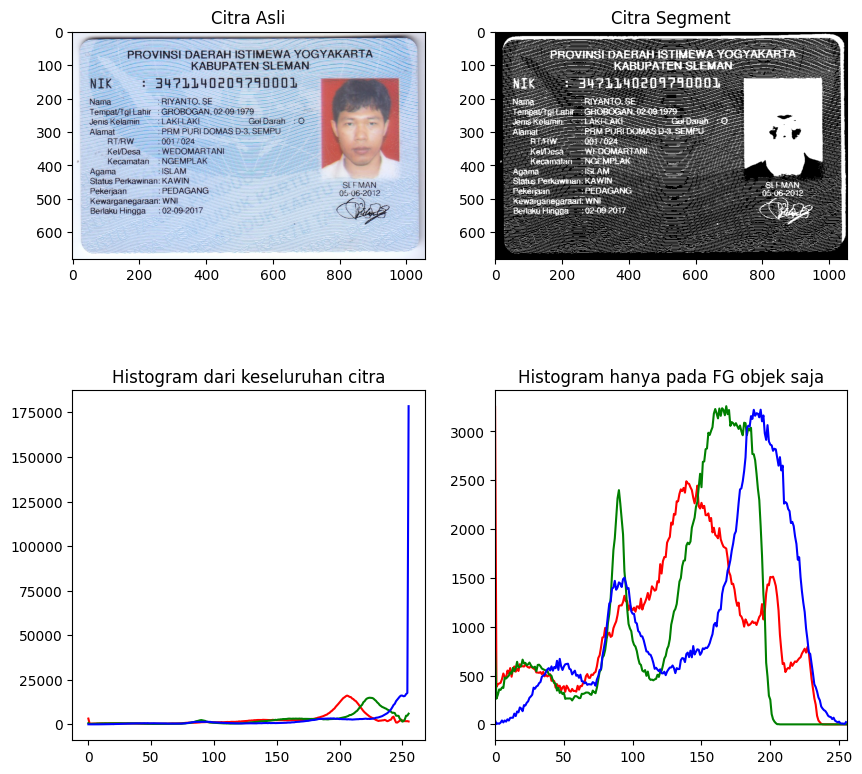

In [81]:
img = cv2.imread('drive/MyDrive/Kuliah/PCVK/week-10/ktp_riyanto.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
  hist0 = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv2.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])

plt.show()

### 4. Segmentasi dengan K-Mean

In [82]:
# loading image
img6 = cv2.imread('drive/MyDrive/Kuliah/PCVK/week-10/ktp_riyanto.png')
img6 = cv2.cvtColor(img6 ,cv2.COLOR_BGR2RGB)

pixel_values = img6.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [83]:
# model KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 150, 0.1)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None,
criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [84]:
# Masking
centers = np.uint8(centers)

#flattening label array
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]

# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img6.shape)

# membuat model masked image
masked_image = np.copy(img6)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 2] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img6.shape)

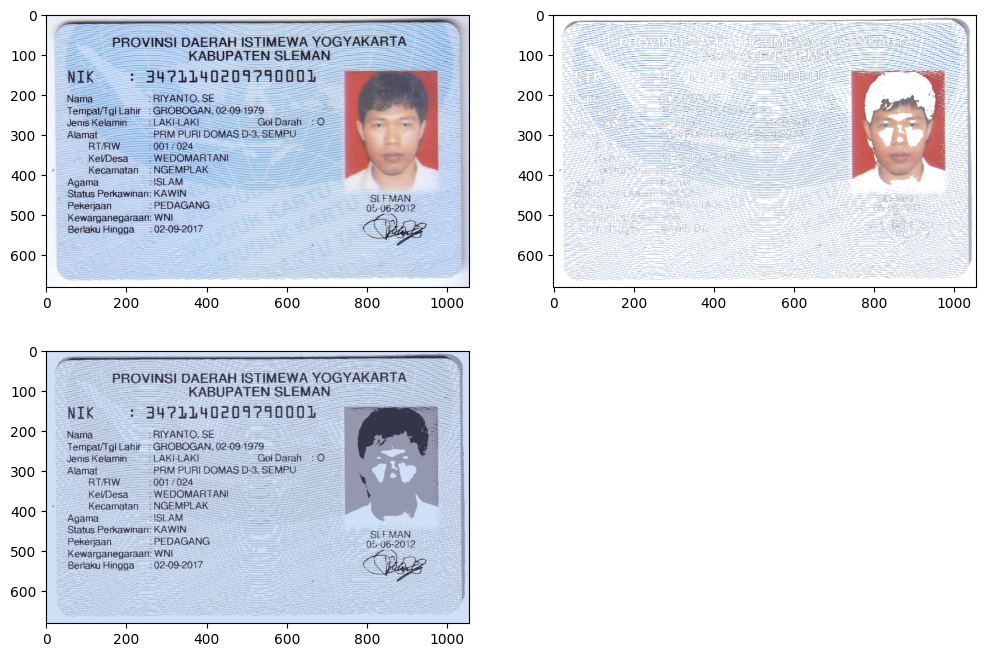

In [85]:
plt.figure(figsize = (12,8))
plt.subplot(2,2,1),plt.imshow(img6)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)
plt.show()


### 5. Implementasi Thresholding Gambar (TUGAS)

In [86]:
!pip install pytesseract
!apt-get install tesseract-ocr
!wget https://github.com/tesseract-ocr/tessdata/raw/main/ind.traineddata -P /usr/share/tesseract-ocr/4.00/tessdata/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,674 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [87]:
import pytesseract

# Set the path to the Tesseract executable (change the path as needed)
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Set the TESSDATA_PREFIX environment variable
pytesseract.pytesseract.tessdata_prefix = '/usr/share/tesseract-ocr/4.00/'

In [88]:
# loading gambar
bgr_image = cv2.imread('drive/MyDrive/Kuliah/PCVK/week-10/ktp_riyanto.png')
# Convert BGR to RGB
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

In [89]:
# mencoba untuk scanning gambar yang telah disegmentasi dengan thresholding
img = cv2.imread('drive/MyDrive/Kuliah/PCVK/week-10/ktp_riyanto.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## (2) Threshold
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
threshed = threshed[5:650][20:1000]

## (3) Detect
result = pytesseract.image_to_string(threshed, lang='ind')

final = []

# (5) Normalize
for word in result.split("\n"):
  if "”—" in word:
    word = word.replace("”—", ":")

  # Normalize NIK
  if "NIK" in word:
    nik_char = word.split()
  if "?" in word:
    word = word.replace("?", "7")
  if ">" in word:
    word = word.replace(">", ":")
  if "(" in word:
    word = word.replace("(", "/")

  final.append(word)

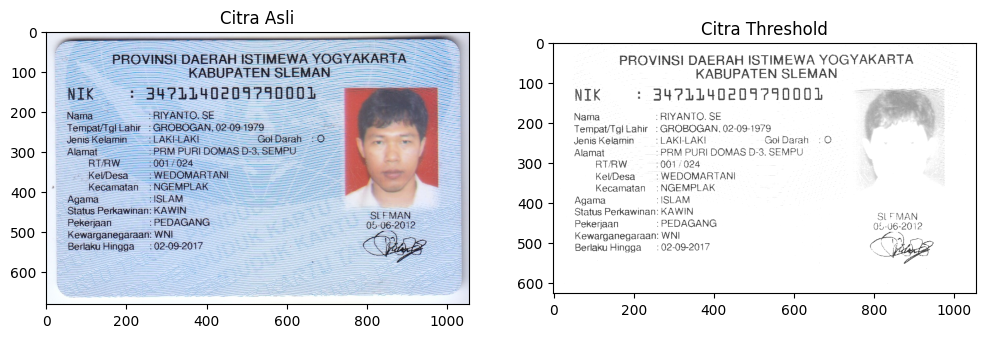

In [90]:
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(rgb_image), plt.title("Citra Asli")
plt.subplot(122), plt.imshow(threshed, cmap="gray"), plt.title("Citra Threshold")
plt.show()

In [91]:
# Hasil Scanning
ocr_text = "\n".join(final)
print(ocr_text)

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 3471140209 790001

Nama :RIYANTO. SE

Tempat/Tgi Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah :O

Alamat PRM PURI DOMAS D-3. SEMPU
RTARW 001: 024

Kel/Desa : WEDOMARTANI
Kecamatan : NGEMPLAK

Agama . ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG

Kewarganegaraan: WNI
Berlaku Hingga  :02-09-2017

 

